In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saikoushikpentyala","key":"1ddca6d8ac32ded7f92b733d9bc7584d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 74 May  6 02:00 kaggle.json
{"username":"saikoushikpentyala","key":"1ddca6d8ac32ded7f92b733d9bc7584d"}

In [ ]:
!sudo apt-get install python-lxml


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython2-stdlib python-backports.functools-lru-cache python-bs4
  python-chardet python-html5lib python-pkg-resources python-six
  python-soupsieve python-webencodings python2 python2-minimal
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-setuptools python2-doc
  python-tk
The following NEW packages will be installed:
  libpython2-stdlib python-backports.functools-lru-cache python-bs4
  python-chardet python-html5lib python-lxml python-pkg-resources python-six
  python-soupsieve python-webencodings python2 python2-minimal
0 upgraded, 12 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,448 kB of archives.
After this operation, 8,395 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2-minimal amd64 2.7.17-2ubuntu4 [27.5 kB]
Get:2 http://a

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d moltean/fruits

100% 1.28G/1.28G [00:33<00:00, 42.5MB/s]
100% 1.28G/1.28G [00:33<00:00, 41.0MB/s]


In [ ]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [ ]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
print("Keras Version: ", tf.keras.__version__)

Keras Version:  2.12.0


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train_dir = '/content/fruits-360_dataset/fruits-360/Training'

In [ ]:
test_dir = '/content/fruits-360_dataset/fruits-360/Test'

# load these images off disk using image_dataset_from_directory
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
Old solution: Use ImageDataGenerator to rescale the images: https://keras.io/preprocessing/image/

In [ ]:
base_dir = '/'
print(base_dir)

/


In [ ]:
batch_size = 32
img_height = 128 #180
img_width = 128 #180

In [ ]:
# Establishes a Pipe line instead of loading the dataset directly
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [ ]:
# Validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 67692 files belonging to 131 classes.
Using 13538 files for validation.


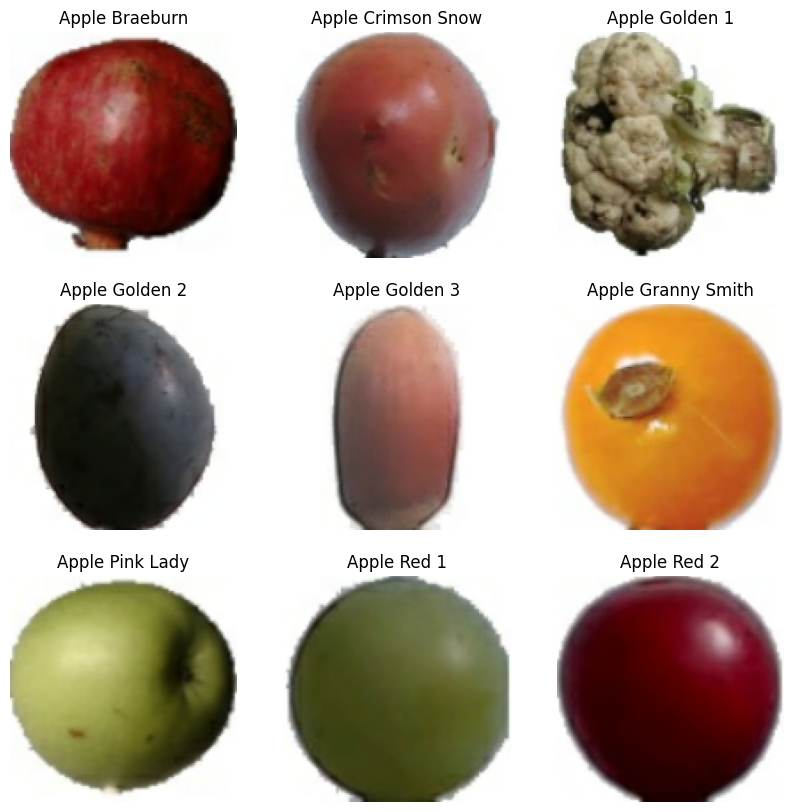

In [ ]:
# Checking for images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, groundlabels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

In [ ]:
#manually iterate over the dataset and retrieve batches of images:
#This is a batch of 32 images of shape 180x180x3 (the last dimension referes to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
# number of batches
train_ds.cardinality().numpy()

1693

In [ ]:
batch_size = 32
img_height = 128
img_width = 128
IMG_SIZE = (img_height, img_width)
IMG_SHAPE = IMG_SIZE + (3,)
num_classes = 131

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
def getModel(base_model,preprocess_input):
    batch_size = 32
    img_height = 128
    img_width = 128
    IMG_SIZE = (img_height, img_width)
    IMG_SHAPE = IMG_SIZE + (3,)
    num_classes = 131
    
    data_augmentation = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
      tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    ])
    

    base_model.trainable = False
    
    header = tf.keras.Sequential([
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax', dtype=tf.float32) 
    ])
    
    inputs = tf.keras.Input(shape=IMG_SHAPE)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    outputs = header(x)
    model = tf.keras.Model(inputs, outputs)
    base_learning_rate = 0.0001
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

In [ ]:
def getFineTuneModel(model,fine_tune_at):
  model_base=model.layers[4]
  for layer in model.layers[4].layers[fine_tune_at:]:
    layer.trainable =  True
  base_learning_rate = 0.0001
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/10),
          #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])
  return model

In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')

In [ ]:
def plotHistoryFinetune(history,history_finetune,initial_epochs):
  acc = history.history['accuracy']
  acc += history_finetune.history['accuracy']

  val_acc = history.history['val_accuracy']
  val_acc += history_finetune.history['val_accuracy']

  loss = history.history['loss']
  loss += history_finetune.history['loss']

  val_loss = history.history['val_loss']
  val_loss += history_finetune.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.ylim([0.8, 1])
  plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.ylim([0, 1.0])
  plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()


In [ ]:
def trainTLModel(base_model,preprocess_input,fine_tune_at,train_ds,val_ds):
  model = getModel(base_model,preprocess_input)
  newModel = model
  fineTuneModel = getFineTuneModel(newModel,fine_tune_at)
  # Transfer Learning:
  #loss0, accuracy0 = model.evaluate(val_ds)
  history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds)
  #Fine Tuning
  #loss1, accuracy1 = fineTuneModel.evaluate(val_ds)
  fine_tune_epochs = 20
  initial_epochs = 10
  total_epochs =  initial_epochs + fine_tune_epochs
  history_finetune = fineTuneModel.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)
  plotHistoryFinetune(history,history_finetune,initial_epochs)
  return [history,history_finetune,model,fineTuneModel]


In [ ]:
resnet_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
preprocess_input = tf.keras.applications.resnet50.preprocess_input

resnet_tl_model = getModel(resnet_model,preprocess_input)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet_tl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 128, 128, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 sequential_1 (Sequential)   (None, 131)               268419    
                                                             

In [ ]:
resnet_fine_tune_model = getFineTuneModel(resnet_tl_model,100)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1693/1693 [==============================] - 38s 15ms/step - loss: 0.2439 - accuracy: 0.9467 - val_loss: 0.0227 - val_accuracy: 0.9962
Epoch 2/10
1693/1693 [==============================] - 23s 14ms/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0334 - val_accuracy: 0.9928
Epoch 3/10
1693/1693 [==============================] - 23s 14ms/step - loss: 0.0195 - accuracy: 0.9944 - val_loss: 0.0347 - val_accuracy: 0.9920
Epoch 4/10
1693/1693 [==============================] - 23s 13ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0053 - val_accuracy: 0.9981
Epoch 5/10
1693/1693 [==============================] - 22s 13ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 6/10
1693/1693 [==============================] - 22s 13ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0072 - val_accuracy: 0.9984
Epoch 7/10
1693/1693 [==============================] - 22s 13ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0023 - val_accura

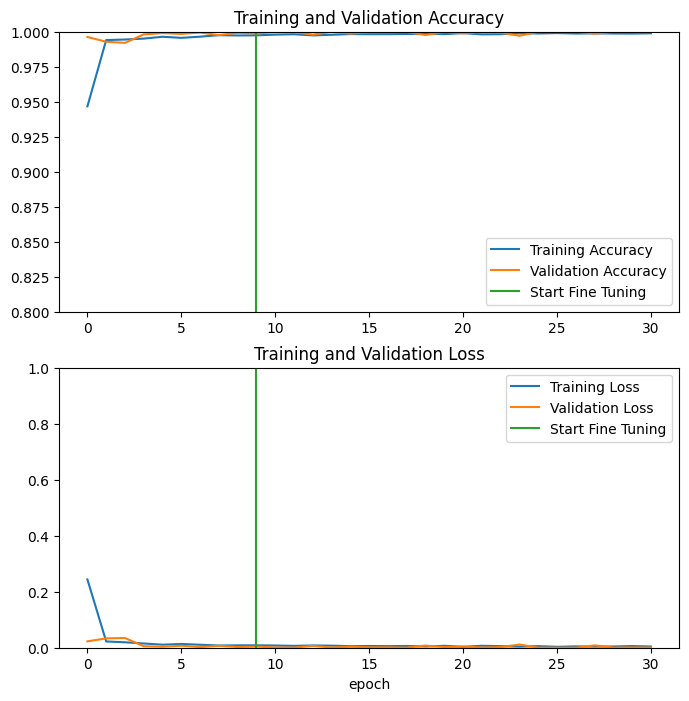

In [ ]:
[history,history_finetune,tl_model,fineTuneModel] = trainTLModel(resnet_model,preprocess_input,100,train_ds,val_ds)

In [ ]:
import numpy as np
np.save('resnet_finetunehistory.npy',history_finetune.history)
np.save('resnet_tl_history.npy',history.history)

In [ ]:
fineTuneModel.save('saved_models/resnet50model_finetune/', save_format='tf')

In [ ]:
tl_model.save('saved_models/resnet50model_transferlearning/', save_format='tf')

In [ ]:
!ls

fruits-360_dataset	  fruits.zip   resnet_finetunehistory.npy  sample_data
fruits-360-original-size  kaggle.json  resnet_tl_history.npy	   saved_models


In [ ]:
 !zip resnet50model_finetune.zip -r ./saved_models

  adding: saved_models/ (stored 0%)
  adding: saved_models/resnet50model_transferlearning/ (stored 0%)
  adding: saved_models/resnet50model_transferlearning/assets/ (stored 0%)
  adding: saved_models/resnet50model_transferlearning/saved_model.pb (deflated 91%)
  adding: saved_models/resnet50model_transferlearning/variables/ (stored 0%)
  adding: saved_models/resnet50model_transferlearning/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_models/resnet50model_transferlearning/variables/variables.index (deflated 78%)
  adding: saved_models/resnet50model_transferlearning/keras_metadata.pb (deflated 96%)
  adding: saved_models/resnet50model_transferlearning/fingerprint.pb (stored 0%)
  adding: saved_models/resnet50model_finetune/ (stored 0%)
  adding: saved_models/resnet50model_finetune/assets/ (stored 0%)
  adding: saved_models/resnet50model_finetune/saved_model.pb (deflated 91%)
  adding: saved_models/resnet50model_finetune/variables/ (stored 0%)
  adding: saved_model

In [ ]:
from google.colab import files
files.download('resnet50model_finetune.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>